# Random Fields

abalone
Total: 4177 | Obs: 125 (2.9925784055542257%)


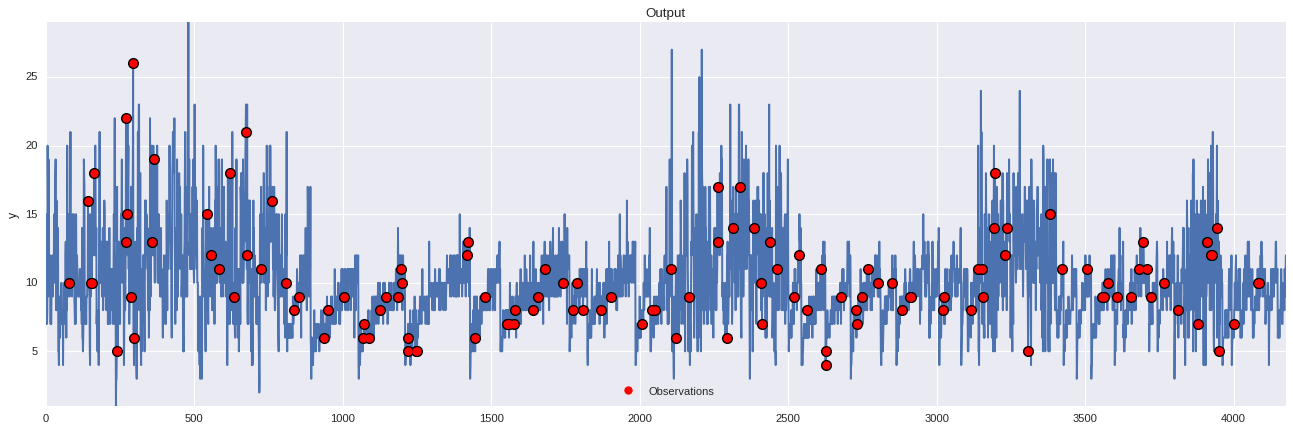

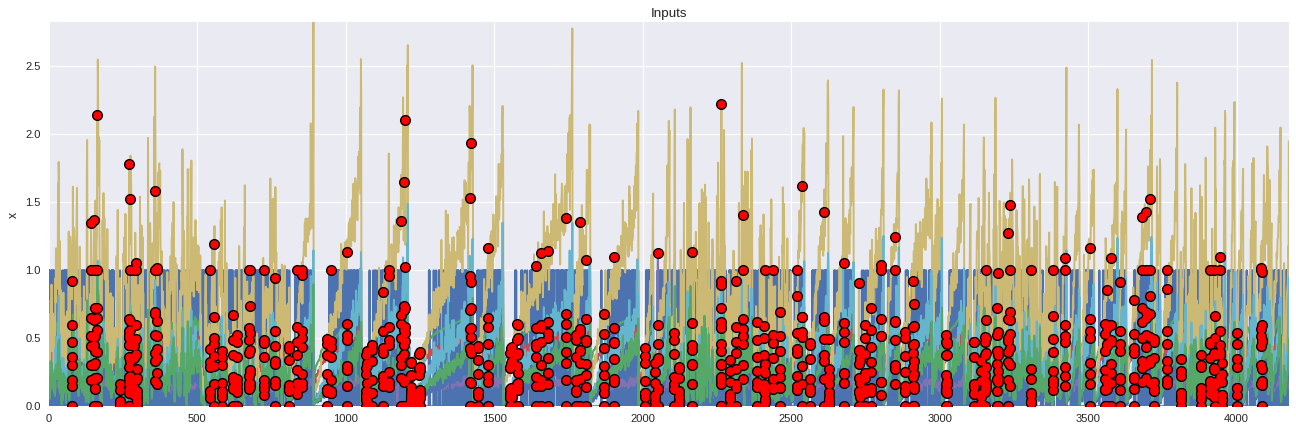

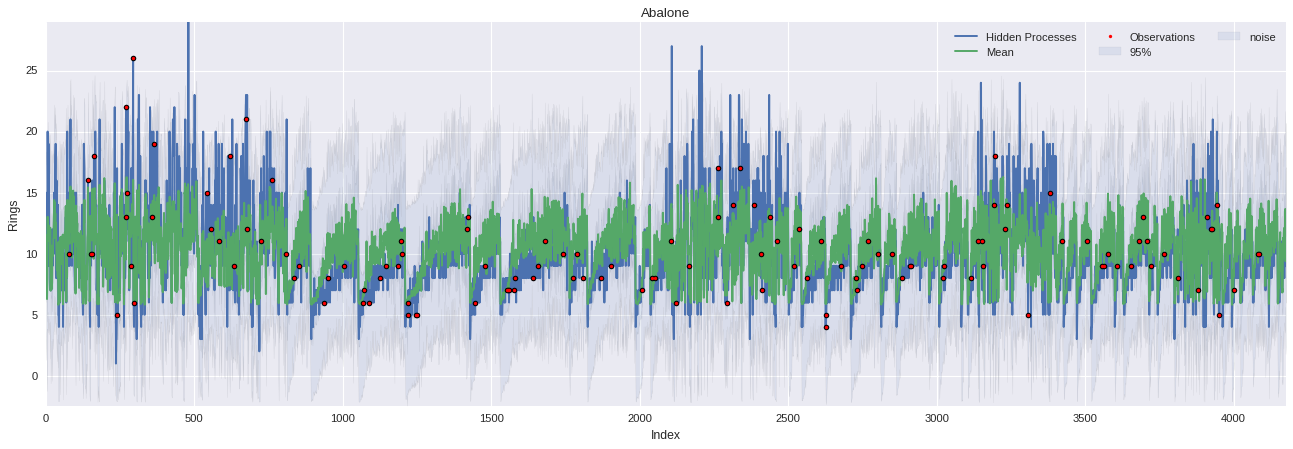

{'WGP_Bias_Bias': 10.2,
 'WGP_BoxCoxLinear_power_log_': array(0.0, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(0.0, dtype=float32),
 'WGP_BoxCoxLinear_shift': 1.0,
 'WGP_Noise_var_log_': array(2.6298723220825195, dtype=float32),
 'WGP_SE_rate_log_': array([ 0.48954821,  1.46233952,  1.6368258 ,  2.13857508,  0.03409082,
         0.859945  ,  1.57839251,  1.23069751], dtype=float32),
 'WGP_SE_var_log_': array(2.6298723220825195, dtype=float32),
 '_l1': 1.9216084,
 '_l2': 6.3483915,
 '_ll': array(-324.98529052734375, dtype=float32)}

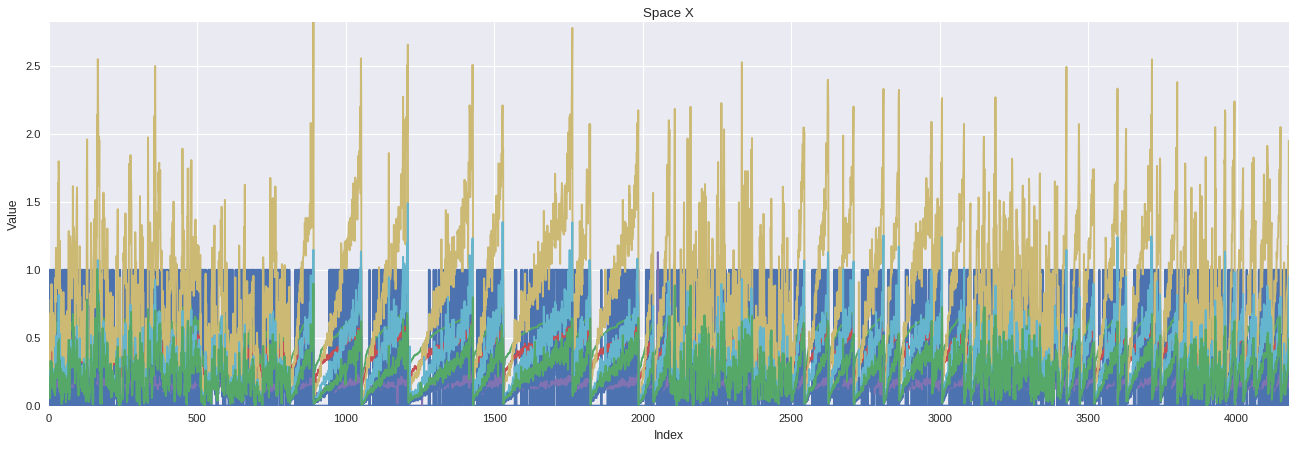

In [1]:
%reload_ext autoreload
%reload_ext line_profiler
%autoreload 2
%matplotlib inline

import g3py as g3

g3.style_seaborn()

psamples = 0.03
random = True

x, y = g3.data_abalone()
if random:
    obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, psamples, plot=True)
else:
    obs_j = np.array([  37,   62,   86,  124,  141,  144,  170,  215,  217,  230,  250,
        272,  378,  421,  528,  598,  608,  654,  798,  803,  806,  830,
        945,  959,  967,  972, 1032, 1049, 1050, 1053, 1070, 1077, 1078,
       1083, 1100, 1163, 1230, 1285, 1289, 1323, 1354, 1355, 1381, 1443,
       1445, 1490, 1502, 1521, 1531, 1563, 1605, 1612, 1626, 1645, 1680,
       1733, 1764, 1800, 1818, 1841, 1992, 2016, 2198, 2305, 2312, 2377,
       2381, 2408, 2452, 2501, 2506, 2513, 2540, 2641, 2695, 2728, 2733,
       2754, 2793, 2820, 2846, 2900, 2928, 2934, 2935, 2965, 2985, 3008,
       3009, 3049, 3085, 3107, 3161, 3277, 3287, 3304, 3326, 3327, 3344,
       3365, 3387, 3414, 3417, 3425, 3543, 3557, 3584, 3620, 3630, 3652,
       3673, 3699, 3781, 3856, 3858, 3897, 3957, 4042, 4054, 4056, 4066,
       4085, 4095, 4148, 4149])
    
gp = g3.WGP(space=x, location=g3.Bias(), kernel=g3.SE(), mapping=g3.BoxCoxLinear(), noisy=True)
gp.describe('Abalone','Index','Rings')
gp.observed(inputs=x_obs, outputs=y_obs, index=obs_j, hidden=y)
gp.plot(plot_space=True)
gp.eval_params(gp.params)

'Starting function value (-logp): 324.985'
'start_bfgs'
         Current function value: 275.450500
         Iterations: 34
         Function evaluations: 64
         Gradient evaluations: 52
array([ -3.70328608,   7.87538357,  -2.44451622,  -2.130473  ,
        -1.70285426,  -6.33341072,   0.57269585,   1.5839448 ,
        -0.48497657,   0.81625205, -13.79343661,  -4.76430237,
         0.54236689,  11.29187158])
{'WGP_Bias_Bias': array(11.291872024536133, dtype=float32),
 'WGP_BoxCoxLinear_power_log_': array(-3.7032861709594727, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(7.875383377075195, dtype=float32),
 'WGP_BoxCoxLinear_shift': array(-2.444516181945801, dtype=float32),
 'WGP_Noise_var_log_': array(-2.1304728984832764, dtype=float32),
 'WGP_SE_rate_log_': array([ -1.70285428,  -6.33341074,   0.57269585,   1.5839448 ,
        -0.48497656,   0.81625205, -13.793437  ,  -4.76430225], dtype=float32),
 'WGP_SE_var_log_': array(0.5423668622970581, dtype=float32)}
{'WGP_Bias_Bia

{'WGP_Bias_Bias': array(-0.9007738828659058, dtype=float32),
 'WGP_BoxCoxLinear_power_log_': array(-1.0132246017456055, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(0.2442290335893631, dtype=float32),
 'WGP_BoxCoxLinear_shift': array(-8.999999046325684, dtype=float32),
 'WGP_Noise_var_log_': array(1.7884176969528198, dtype=float32),
 'WGP_SE_rate_log_': array([-1.135216  , -4.30637932,  0.88468128,  2.02798462, -7.45319748,
         1.00043786,  1.40067172,  0.50677174], dtype=float32),
 'WGP_SE_var_log_': array(3.2226881980895996, dtype=float32),
 '_l1': 1.7770239,
 '_l2': 6.226758,
 '_ll': array(-162.34498596191406, dtype=float32)}

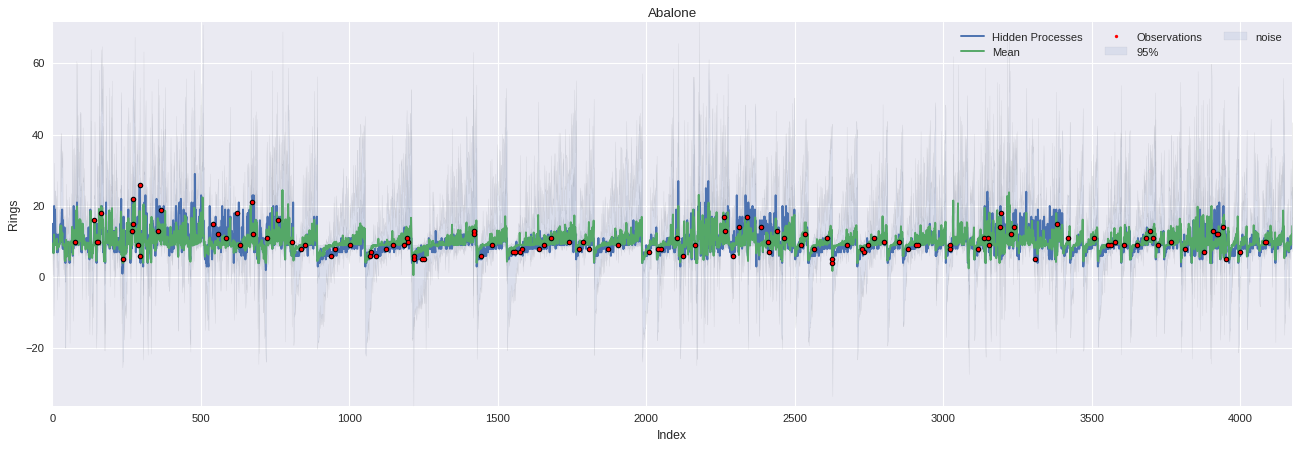

In [2]:
params = gp.find_MAP(points=4)
gp.plot(params)
gp.eval_params(params)

In [3]:
file = 'datatrace_random_fields.h5'
try:
    datatrace = g3.load_datatrace(file)
except:
    datatrace = gp.sample_hypers(start=params, samples=10000)
    g3.save_datatrace(datatrace, file)
datatrace

,WGP_BoxCoxLinear_power_log_,WGP_BoxCoxLinear_scale_log_,WGP_BoxCoxLinear_shift,WGP_Noise_var_log_,WGP_SE_rate_log___0,WGP_SE_rate_log___1,WGP_SE_rate_log___2,WGP_SE_rate_log___3,WGP_SE_rate_log___4,WGP_SE_rate_log___5,WGP_SE_rate_log___6,WGP_SE_rate_log___7,WGP_SE_var_log_,WGP_Bias_Bias,_nchain,_niter,_burnin,_outlayer,_ll
0,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,0,False,True,-270.632996
1,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,1,False,True,-270.632996
2,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,2,False,True,-270.632996
3,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,3,False,True,-270.632996
4,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,4,False,True,-270.632996
5,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,5,False,True,-270.632996
6,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,6,False,True,-270.632996
7,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,7,False,True,-270.632996
8,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,8,False,True,-270.632996
9,-0.816940,0.423403,-6.938739,0.698406,-12.184082,-8.238060,0.944200,-4.863984,-10.985140,-0.690866,-8.627739,0.027739,5.147936,-4.291669,0,9,False,True,-270.632996


In [4]:
datatrace._burnin = datatrace._niter > 1000

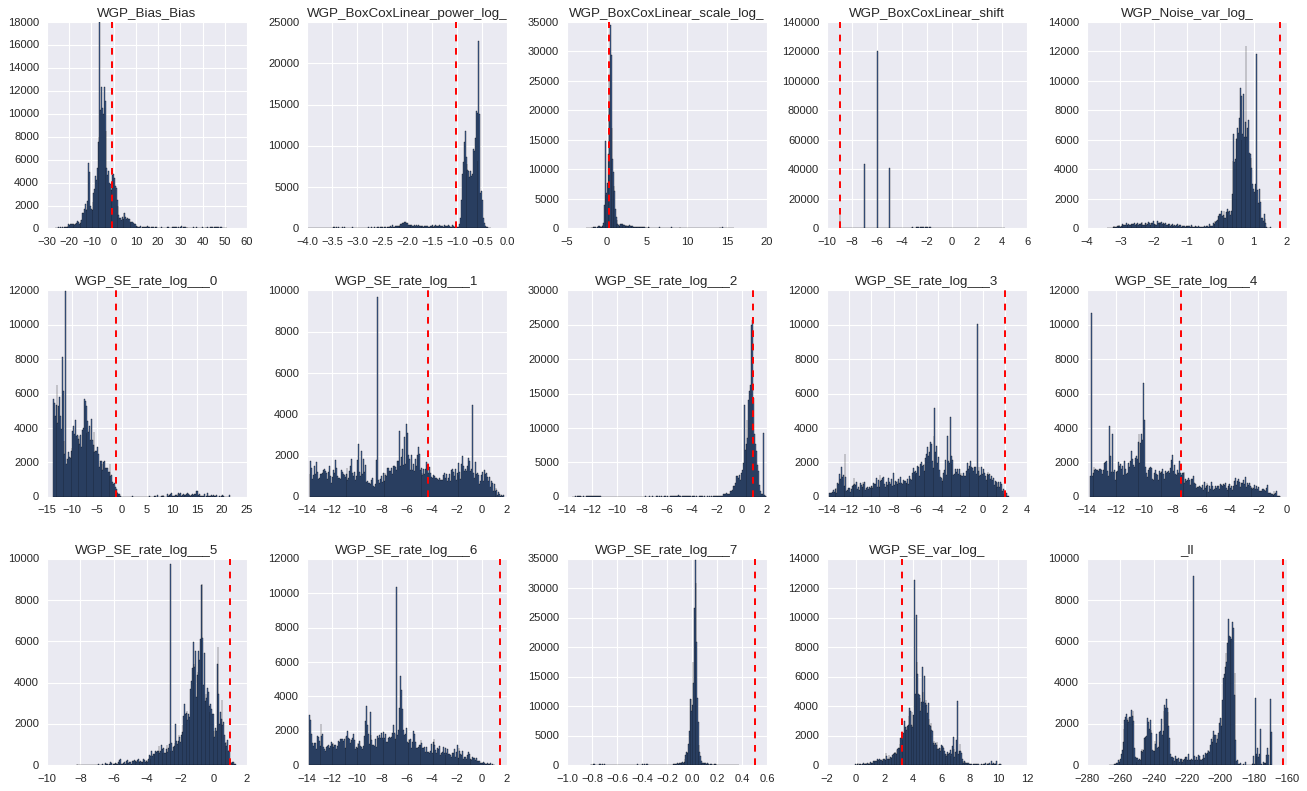

In [5]:
g3.hist_datatrace(datatrace, reference=gp.eval_params(params))

In [6]:
dt = datatrace.sample(10)
dt

,WGP_BoxCoxLinear_power_log_,WGP_BoxCoxLinear_scale_log_,WGP_BoxCoxLinear_shift,WGP_Noise_var_log_,WGP_SE_rate_log___0,WGP_SE_rate_log___1,WGP_SE_rate_log___2,WGP_SE_rate_log___3,WGP_SE_rate_log___4,WGP_SE_rate_log___5,WGP_SE_rate_log___6,WGP_SE_rate_log___7,WGP_SE_var_log_,WGP_Bias_Bias,_nchain,_niter,_burnin,_outlayer,_ll
154752,-0.863636,0.112253,-5.999999,0.919096,-6.179373,0.119982,0.939952,-6.483697,-9.276839,-1.931970,-10.626630,0.017853,3.997651,-7.309463,15,4752,True,True,-199.201248
90168,-0.529735,0.494764,-6.000822,0.808195,-6.980983,-0.146631,0.619788,-1.420654,-6.107715,-2.053907,-2.903560,-0.012501,4.127187,-5.885045,9,168,False,True,-236.401596
52997,-0.559986,0.350589,-4.999979,0.574823,-10.692871,-7.268171,0.507281,-12.993113,-9.113082,-0.417154,-13.808291,0.013373,4.952890,-5.797108,5,2997,True,True,-239.033310
155173,-0.828497,0.059955,-5.999999,0.633475,-6.064586,-0.265251,0.953661,-10.467329,-9.560532,-2.177278,-13.071473,0.029942,3.754110,-8.713620,15,5173,True,True,-194.716766
128650,-0.817041,0.172219,-6.000000,0.663886,-5.519845,-8.753365,1.293672,-7.810681,-7.556799,-1.464666,-13.342877,0.062165,2.559378,-7.543560,12,8650,True,True,-196.092957
204824,-0.778312,0.841298,-5.999999,0.735948,-3.990339,-4.109125,0.136055,-0.746782,-10.079226,-0.752522,-2.892412,-0.006225,5.673102,-2.382476,20,4824,True,True,-195.550644
106715,-0.611872,0.581382,-5.999939,0.975331,-9.823586,-6.999700,1.144201,-2.800964,-4.701223,-1.425210,-8.960079,0.002381,4.640337,-5.574243,10,6715,True,True,-220.037582
88169,-0.894114,0.462667,-6.000000,0.688989,-11.653896,-13.711234,1.141330,0.312854,-10.177880,-0.417913,-6.828699,0.052733,3.025434,-2.780422,8,8169,True,True,-192.610107
71221,-0.842910,0.132162,-5.999978,0.715992,-6.577024,-10.546661,1.152692,-8.103960,-12.216694,-1.744956,-6.772830,0.048668,4.044801,-5.513263,7,1221,True,True,-218.261642
108563,-0.679904,0.461681,-6.000000,0.881126,-9.251440,-7.988810,0.306510,-5.002632,-2.964777,-1.951275,-9.658831,0.005001,5.553179,-14.277067,10,8563,True,True,-194.072586


In [7]:
gp.active.transformations

{'WGP_BoxCoxLinear_power': <theano.compile.function_module.Function at 0x7fc7018cb048>,
 'WGP_BoxCoxLinear_power_log_': <theano.compile.function_module.Function at 0x7fc7018b9e80>,
 'WGP_BoxCoxLinear_scale': <theano.compile.function_module.Function at 0x7fc7018b7908>,
 'WGP_BoxCoxLinear_scale_log_': <theano.compile.function_module.Function at 0x7fc701d33d68>,
 'WGP_Noise_var': <theano.compile.function_module.Function at 0x7fc7018b0908>,
 'WGP_Noise_var_log_': <theano.compile.function_module.Function at 0x7fc701d2beb8>,
 'WGP_SE_rate': <theano.compile.function_module.Function at 0x7fc701d2a048>,
 'WGP_SE_rate_log_': <theano.compile.function_module.Function at 0x7fc701d11eb8>,
 'WGP_SE_var': <theano.compile.function_module.Function at 0x7fc703d25780>,
 'WGP_SE_var_log_': <theano.compile.function_module.Function at 0x7fc702b96828>}

In [8]:
gp.compiles

{'array_posterior_dlogp': <g3py.libs.tensors.makefn at 0x7fc6f6c04c50>,
 'array_posterior_loglike': <g3py.libs.tensors.makefn at 0x7fc6f0317748>,
 'array_posterior_logp': <g3py.libs.tensors.makefn at 0x7fc70fcb4ac8>,
 'array_prior_logp': <g3py.libs.tensors.makefn at 0x7fc6ef74c4a8>,
 'posterior_dlogp': <g3py.libs.tensors.makefn at 0x7fc6f6bea2b0>,
 'posterior_kernel_sd': <g3py.libs.tensors.makefn at 0x7fc6eb1fdac8>,
 'posterior_kernel_sd_noise': <g3py.libs.tensors.makefn at 0x7fc6e8ac0b00>,
 'posterior_location': <g3py.libs.tensors.makefn at 0x7fc7031d4f98>,
 'posterior_location_noise': <g3py.libs.tensors.makefn at 0x7fc6e91574a8>,
 'posterior_loglike': <g3py.libs.tensors.makefn at 0x7fc6f03173c8>,
 'posterior_logp': <g3py.libs.tensors.makefn at 0x7fc70fcb4b00>,
 'posterior_mapping': <g3py.libs.tensors.makefn at 0x7fc6eb1fd2e8>,
 'posterior_mean': <g3py.libs.tensors.makefn at 0x7fc6ef4c9898>,
 'posterior_std': <g3py.libs.tensors.makefn at 0x7fc703474908>,
 'posterior_std_noise': <g3py.

In [9]:
fix_params = {'WGP_Noise_var' : 0.1,
             'WGP_BoxCoxLinear_power_log_': 0.1}
fix_transform = gp.active.transform_params(fix_params, to_dict=True, to_transformed=True, complete=False)
fix_transform

{'WGP_BoxCoxLinear_power_log_': 0.1,
 'WGP_Noise_var_log_': array(-2.3025851249694824, dtype=float32)}

In [10]:
dt.WGP_Noise_var_log_ = fix_transform.WGP_Noise_var_log_
dt

,WGP_BoxCoxLinear_power_log_,WGP_BoxCoxLinear_scale_log_,WGP_BoxCoxLinear_shift,WGP_Noise_var_log_,WGP_SE_rate_log___0,WGP_SE_rate_log___1,WGP_SE_rate_log___2,WGP_SE_rate_log___3,WGP_SE_rate_log___4,WGP_SE_rate_log___5,WGP_SE_rate_log___6,WGP_SE_rate_log___7,WGP_SE_var_log_,WGP_Bias_Bias,_nchain,_niter,_burnin,_outlayer,_ll
154752,-0.863636,0.112253,-5.999999,-2.302585,-6.179373,0.119982,0.939952,-6.483697,-9.276839,-1.931970,-10.626630,0.017853,3.997651,-7.309463,15,4752,True,True,-199.201248
90168,-0.529735,0.494764,-6.000822,-2.302585,-6.980983,-0.146631,0.619788,-1.420654,-6.107715,-2.053907,-2.903560,-0.012501,4.127187,-5.885045,9,168,False,True,-236.401596
52997,-0.559986,0.350589,-4.999979,-2.302585,-10.692871,-7.268171,0.507281,-12.993113,-9.113082,-0.417154,-13.808291,0.013373,4.952890,-5.797108,5,2997,True,True,-239.033310
155173,-0.828497,0.059955,-5.999999,-2.302585,-6.064586,-0.265251,0.953661,-10.467329,-9.560532,-2.177278,-13.071473,0.029942,3.754110,-8.713620,15,5173,True,True,-194.716766
128650,-0.817041,0.172219,-6.000000,-2.302585,-5.519845,-8.753365,1.293672,-7.810681,-7.556799,-1.464666,-13.342877,0.062165,2.559378,-7.543560,12,8650,True,True,-196.092957
204824,-0.778312,0.841298,-5.999999,-2.302585,-3.990339,-4.109125,0.136055,-0.746782,-10.079226,-0.752522,-2.892412,-0.006225,5.673102,-2.382476,20,4824,True,True,-195.550644
106715,-0.611872,0.581382,-5.999939,-2.302585,-9.823586,-6.999700,1.144201,-2.800964,-4.701223,-1.425210,-8.960079,0.002381,4.640337,-5.574243,10,6715,True,True,-220.037582
88169,-0.894114,0.462667,-6.000000,-2.302585,-11.653896,-13.711234,1.141330,0.312854,-10.177880,-0.417913,-6.828699,0.052733,3.025434,-2.780422,8,8169,True,True,-192.610107
71221,-0.842910,0.132162,-5.999978,-2.302585,-6.577024,-10.546661,1.152692,-8.103960,-12.216694,-1.744956,-6.772830,0.048668,4.044801,-5.513263,7,1221,True,True,-218.261642
108563,-0.679904,0.461681,-6.000000,-2.302585,-9.251440,-7.988810,0.306510,-5.002632,-2.964777,-1.951275,-9.658831,0.005001,5.553179,-14.277067,10,8563,True,True,-194.072586


In [11]:
keys = ['WGP_Noise_var_log_', 'WGP_SE_rate_log___2']
gp.active.fix_vars(dt, keys)
gp.active.fixed_keys

['WGP_Noise_var_log_', 'WGP_SE_rate_log___2']

In [12]:
gp.active.fixed_chain[:, gp.active.fixed_dims].mean(axis=0)

array([-2.3025851249694824, 0.8195143002681169], dtype=object)

In [13]:
gp.active.fixed_dims

[3, 6]

In [14]:
gp.active.fixed_datatrace

,WGP_BoxCoxLinear_power_log_,WGP_BoxCoxLinear_scale_log_,WGP_BoxCoxLinear_shift,WGP_Noise_var_log_,WGP_SE_rate_log___0,WGP_SE_rate_log___1,WGP_SE_rate_log___2,WGP_SE_rate_log___3,WGP_SE_rate_log___4,WGP_SE_rate_log___5,WGP_SE_rate_log___6,WGP_SE_rate_log___7,WGP_SE_var_log_,WGP_Bias_Bias,_nchain,_niter,_burnin,_outlayer,_ll
154752,-0.863636,0.112253,-5.999999,-2.302585,-6.179373,0.119982,0.939952,-6.483697,-9.276839,-1.931970,-10.626630,0.017853,3.997651,-7.309463,15,4752,True,True,-199.201248
90168,-0.529735,0.494764,-6.000822,-2.302585,-6.980983,-0.146631,0.619788,-1.420654,-6.107715,-2.053907,-2.903560,-0.012501,4.127187,-5.885045,9,168,False,True,-236.401596
52997,-0.559986,0.350589,-4.999979,-2.302585,-10.692871,-7.268171,0.507281,-12.993113,-9.113082,-0.417154,-13.808291,0.013373,4.952890,-5.797108,5,2997,True,True,-239.033310
155173,-0.828497,0.059955,-5.999999,-2.302585,-6.064586,-0.265251,0.953661,-10.467329,-9.560532,-2.177278,-13.071473,0.029942,3.754110,-8.713620,15,5173,True,True,-194.716766
128650,-0.817041,0.172219,-6.000000,-2.302585,-5.519845,-8.753365,1.293672,-7.810681,-7.556799,-1.464666,-13.342877,0.062165,2.559378,-7.543560,12,8650,True,True,-196.092957
204824,-0.778312,0.841298,-5.999999,-2.302585,-3.990339,-4.109125,0.136055,-0.746782,-10.079226,-0.752522,-2.892412,-0.006225,5.673102,-2.382476,20,4824,True,True,-195.550644
106715,-0.611872,0.581382,-5.999939,-2.302585,-9.823586,-6.999700,1.144201,-2.800964,-4.701223,-1.425210,-8.960079,0.002381,4.640337,-5.574243,10,6715,True,True,-220.037582
88169,-0.894114,0.462667,-6.000000,-2.302585,-11.653896,-13.711234,1.141330,0.312854,-10.177880,-0.417913,-6.828699,0.052733,3.025434,-2.780422,8,8169,True,True,-192.610107
71221,-0.842910,0.132162,-5.999978,-2.302585,-6.577024,-10.546661,1.152692,-8.103960,-12.216694,-1.744956,-6.772830,0.048668,4.044801,-5.513263,7,1221,True,True,-218.261642
108563,-0.679904,0.461681,-6.000000,-2.302585,-9.251440,-7.988810,0.306510,-5.002632,-2.964777,-1.951275,-9.658831,0.005001,5.553179,-14.277067,10,8563,True,True,-194.072586


In [15]:
gp.active.fixed_chain

array([[-0.8636363089267373, 0.11225305408414532, -5.999999405268778,
        -2.3025851249694824, -6.17937296755675, 0.11998153537378631,
        0.939951795470825, -6.483697426100225, -9.27683905748083,
        -1.9319702749764636, -10.626630360184164, 0.017852747080181613,
        3.9976509800697326, -7.309462501578578],
       [-0.5297347904213012, 0.4947643037098147, -6.000822005877697,
        -2.3025851249694824, -6.980983417898036, -0.14663100968596243,
        0.6197884763800056, -1.4206543878132822, -6.107715295127411,
        -2.053906532024066, -2.9035600178681147, -0.012500685045860955,
        4.127187310303139, -5.885044845213608],
       [-0.5599857680840126, 0.35058856357306, -4.99997903409846,
        -2.3025851249694824, -10.692871146970344, -7.268171380168491,
        0.5072808740122859, -12.993112701175285, -9.113081891741198,
        -0.4171540653130499, -13.808290593789863, 0.01337301403369016,
        4.952890389352687, -5.7971083134580805],
       [-0.828497143

In [16]:
gp.active.sampling_dims

[0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13]

In [17]:
%timeit gp.fixed_logprior(gp.active.sampling_params(params))

The slowest run took 4.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.16 ms per loop


In [18]:
%timeit gp.fixed_loglike(gp.active.sampling_params(params))

100 loops, best of 3: 9.88 ms per loop


In [19]:
%timeit gp.fixed_logp(gp.active.sampling_params(params))

100 loops, best of 3: 10.1 ms per loop


In [20]:
%timeit gp.fixed_dlogp(gp.active.sampling_params(params))

100 loops, best of 3: 18.6 ms per loop


In [21]:
%timeit gp.logp(params)

1000 loops, best of 3: 878 µs per loop


In [22]:
%timeit gp.active.dict_to_array(params)

The slowest run took 5.31 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 67.1 µs per loop


In [23]:
%timeit gp.active.sampling_params(params)

10000 loops, best of 3: 82.8 µs per loop


In [24]:
gp.active.fixed_keys

['WGP_Noise_var_log_', 'WGP_SE_rate_log___2']

In [58]:
gp.active.fixed_keys

['WGP_Noise_var_log_', 'WGP_SE_rate_log___2']

In [59]:
pp = gp.find_MAP()

'Starting function value (-logp): 1479.71550293'
'start_bfgs'
         Current function value: 295.025394
         Iterations: 12
         Function evaluations: 114
         Gradient evaluations: 107
{'WGP_Bias_Bias': array(9.93278980255127, dtype=float32),
 'WGP_BoxCoxLinear_power_log_': array(-6.267947673797607, dtype=float32),
 'WGP_BoxCoxLinear_scale_log_': array(8.542082786560059, dtype=float32),
 'WGP_BoxCoxLinear_shift': array(-2.037566900253296, dtype=float32),
 'WGP_Noise_var_log_': array(2.6298723220825195, dtype=float32),
 'WGP_SE_rate_log_': array([ -5.22852516,  -7.32152843,   1.6368258 ,  -3.91385102,
        -5.33237505, -12.38799953,  -6.98184872, -10.54429626], dtype=float32),
 'WGP_SE_var_log_': array(0.5961271524429321, dtype=float32)}


In [67]:
gp.fixed_logp(gp.active.sampling_params(pp))

-295.0253936767578